In [1]:
import os
import sys

# Get the current working directory
cwd = os.getcwd()

# Add the path to the electre_tree module to the Python path
sys.path.append(os.path.join(cwd, 'ELECTRE_Tree'))

from electre_tree import tree_e_tri_b , util_e_tri_b

In [2]:
# Required Libraries
import numpy as np
import pandas as pd

In [93]:
df = pd.read_csv('/project/public_grouped.csv')
df.drop('Unnamed: 0',inplace=True,axis=1)
df.head(3)


,Public WiFi,number of bikes,Mean Inhabitants,Employment,Crime Degree,school_count,Flooding,hospitals_count,Income,Deaths,...,Collision,Run over,Metro,Suburban Train,Metrobus,Trolleybus,RTP,Concessioned,e-bike,Total coverage of transport
0,0.010610,0.0,0.000000,0.2,0.00,0.006682,1.000,0.002594,0.0,1.0,...,1.0,1.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000
1,0.023873,0.0,0.681173,0.2,0.75,0.000000,1.000,0.000000,0.0,1.0,...,1.0,1.000000,0.0,0.0,0.666667,0.0,0.0,0.666667,0.0,0.222222
2,0.015915,0.0,0.637584,0.2,0.75,0.006682,0.875,0.001112,0.0,1.0,...,1.0,0.333333,0.0,0.0,0.000000,0.0,0.5,1.000000,0.0,0.250000


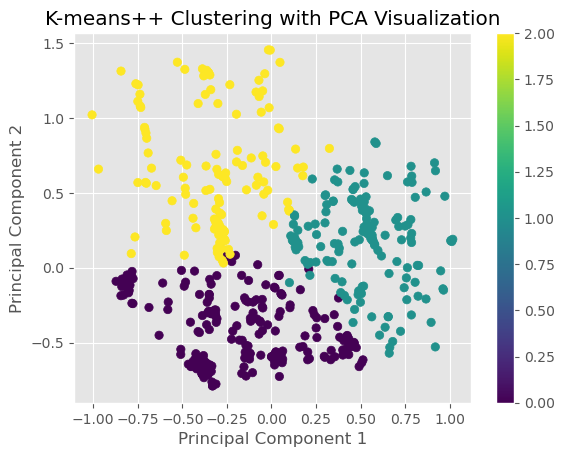

In [101]:


import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# Step 2: Apply PCA and reduce dimensionality to 2 components
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df)

# Step 3: Apply K-means clustering
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(df)

# Step 4: Visualize the clusters on the first 2 principal components
fig, ax = plt.subplots()  # Create a figure and axis
# Step 4: Visualize the clusters on the first 2 principal components
plt.scatter(principal_components[:, 1], principal_components[:, 0], c=clusters,)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-means++ Clustering with PCA Visualization')
plt.colorbar()
plt.show()
#fig.savefig('/project/pictures/cluster_public.png')

In [98]:
from sklearn.metrics import calinski_harabasz_score

labels = kmeans.labels_

# Compute Calinski-Harabasz Index
chi_score = calinski_harabasz_score(df, labels)
print(f"Calinski-Harabasz Index: {chi_score}")


Calinski-Harabasz Index: 117.65364859949261


In [103]:
silhouette_avg = silhouette_score(df, labels)
silhouette_avg

0.2045109409908949

In [4]:
# Convert to array format

arr = df.values
arr

array([[0.        , 0.        , 0.        , ..., 1.        , 0.5       ,
        0.4       ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        0.6       ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        0.4       ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.66666667,
        0.2       ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.5       ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 0.5       ,
        0.        ]])

In [80]:
# Parameters - ELECTRE Tree
rule      = 'pc'
classes   = 3
target    = []
Q         = []
P         = []
V         = []
W         = []
B         = []
models    = 10

# Parameters - GA
elite       = 15
eta         = 4
mu          = 7
size        = 100
rate        = 0.1
generations = 150
samples     = 0.25

In [81]:
# Train Model
models = tree_e_tri_b.tree_electre_tri_b(arr, 
                                         target_assignment = target, 
                                         W = W, 
                                         Q = Q, 
                                         P = P, 
                                         V = V, 
                                         B = B, 
                                         rule = rule, 
                                         number_of_classes = classes, 
                                         elite = elite, 
                                         eta = eta, 
                                         mu = mu, 
                                         mutation_rate = rate, 
                                         generations = generations, 
                                         samples = samples, 
                                         number_of_models = models)

Model # 1
Model # 2
Model # 3
Model # 4
Model # 5
Model # 6
Model # 7
Model # 8
Model # 9
Model # 10


In [82]:
prediction, solutions = tree_e_tri_b.predict(models, arr, verbose = False, rule = 'pc')

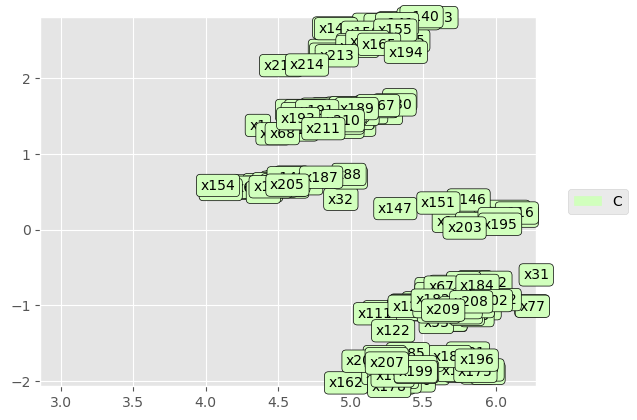

In [83]:
# Plot - Tree Model
util_e_tri_b.plot_points(arr, prediction)

In [84]:
# Elicitated Paramneters
w_mean, w_std, q_mean, q_std, p_mean, p_std, v_mean, v_std, b_mean, b_std, cut_mean, cut_std, acc_mean, acc_std = tree_e_tri_b.metrics(models, number_of_classes = classes)

print('Criteria Weights: ', np.around(w_mean, decimals = 2))
print('Q: ', np.around(q_mean, decimals = 2))
print('P: ', np.around(p_mean, decimals = 2))
print('V: ', np.around(v_mean, decimals = 2))
for i in range(0, len(b_mean)):
    print('b'+str(i+1)+': ', np.around(b_mean[i], decimals = 2))
    print('Lambda Cutoff: ', round(cut_mean,  2))
    print('Accuracy: ',      round(acc_mean,  2))

Criteria Weights:  [0.36 0.69 0.57 0.41 0.41 0.64 0.6  0.76 0.56 0.47 0.27 0.54 0.58 0.62
 0.77 0.46 0.58 0.86 0.31 0.51 0.46 0.4  0.85 0.24 0.39 0.36 0.65 0.74
 0.31 0.31 0.48 0.44 0.4  0.68 0.7  0.64 0.49 0.61 0.66 0.72 0.54 0.78
 0.37 0.69 0.62 0.33 0.68 0.31 0.55 0.56 0.43 0.62 0.45 0.67 0.45 0.35
 0.31 0.58 0.53 0.39 0.49 0.68 0.45 0.75 0.61 0.67 0.34 0.43 0.48 0.53
 0.47 0.33 0.49 0.38 0.42 0.55]
Q:  [0.2  0.19 0.23 0.19 0.26 0.26 0.08 0.18 0.4  0.21 0.27 0.23 0.22 0.27
 0.07 0.41 0.4  0.14 0.21 0.37 0.18 0.36 0.31 0.34 0.13 0.25 0.14 0.21
 0.09 0.19 0.31 0.3  0.2  0.23 0.33 0.29 0.19 0.   0.23 0.08 0.17 0.11
 0.04 0.   0.24 0.27 0.13 0.13 0.35 0.38 0.12 0.08 0.42 0.11 0.   0.24
 0.16 0.26 0.25 0.23 0.14 0.28 0.2  0.25 0.29 0.16 0.19 0.19 0.3  0.
 0.18 0.21 0.2  0.   0.29 0.27]
P:  [0.29 0.37 0.3  0.3  0.41 0.47 0.21 0.26 0.53 0.27 0.37 0.23 0.39 0.33
 0.17 0.47 0.52 0.24 0.29 0.5  0.24 0.4  0.37 0.49 0.19 0.38 0.23 0.24
 0.27 0.19 0.37 0.51 0.38 0.39 0.36 0.3  0.26 0.   0.24 0.1

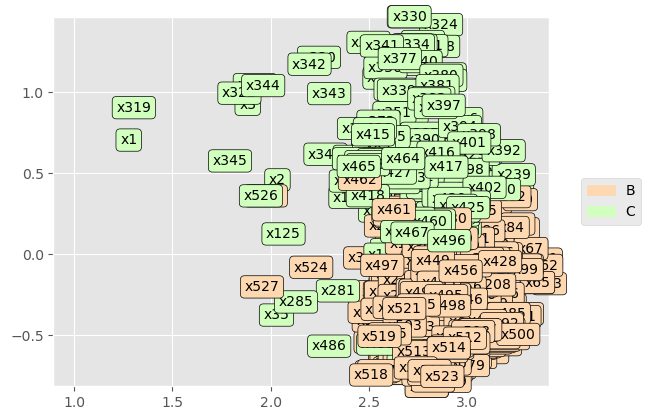

In [114]:
# Plot - Elicitated Parameters
e_tri = util_e_tri_b.electre_tri_b(arr, W = w_mean, Q = q_mean, P = p_mean, V = v_mean,
                                   B = b_mean, cut_level = cut_mean, verbose = False, rule = rule, graph = True) 

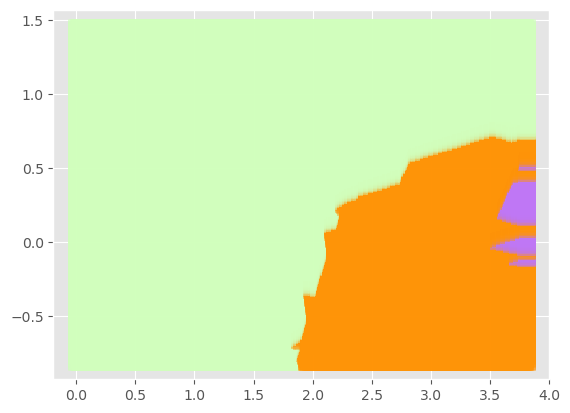

In [106]:
# Plot Tree Model - Decision Boundaries
tree_e_tri_b.plot_decision_boundaries(arr, models)  

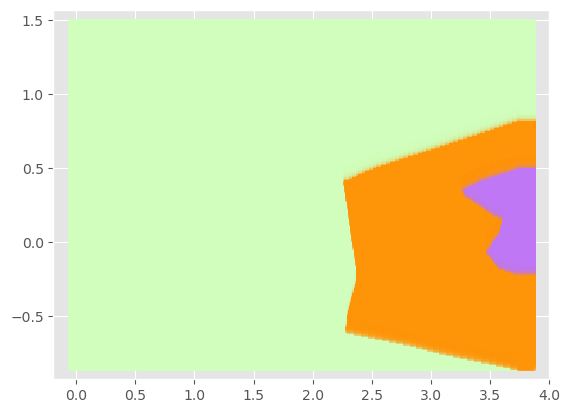

In [108]:
# Plot Mean Model - Decision Boundaries  
model_mean = []
model_mean.append([w_mean, acc_mean, [], [], [], b_mean, cut_mean, [], [], q_mean, p_mean, v_mean])
tree_e_tri_b.plot_decision_boundaries(arr, model_mean)